# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [13]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

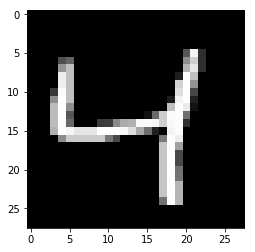

In [15]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [16]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 28*28])
targets_ = tf.placeholder(tf.float32, shape=[None, 28*28])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 28*28)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(loss)

## Training

In [17]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [18]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6845
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6751
Epoch: 1/20... Training loss: 0.6682
Epoch: 1/20... Training loss: 0.6615
Epoch: 1/20... Training loss: 0.6528
Epoch: 1/20... Training loss: 0.6422
Epoch: 1/20... Training loss: 0.6309
Epoch: 1/20... Training loss: 0.6190
Epoch: 1/20... Training loss: 0.6062
Epoch: 1/20... Training loss: 0.5905
Epoch: 1/20... Training loss: 0.5738
Epoch: 1/20... Training loss: 0.5582
Epoch: 1/20... Training loss: 0.5386
Epoch: 1/20... Training loss: 0.5255
Epoch: 1/20... Training loss: 0.5062
Epoch: 1/20... Training loss: 0.4913
Epoch: 1/20... Training loss: 0.4737
Epoch: 1/20... Training loss: 0.4535
Epoch: 1/20... Training loss: 0.4363
Epoch: 1/20... Training loss: 0.4225
Epoch: 1/20... Training loss: 0.4125
Epoch: 1/20... Training loss: 0.4000
Epoch: 1/20... Training loss: 0.3864
E

Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1797
Epoch: 1/20... Training loss: 0.1862
E

Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1517
E

Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1322
E

Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1243
E

Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1124
E

Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1117
E

Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1043
E

Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1007
E

Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1046
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1042
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0975
E

Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0921
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0925
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0972
E

Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0891
Epoch: 11/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

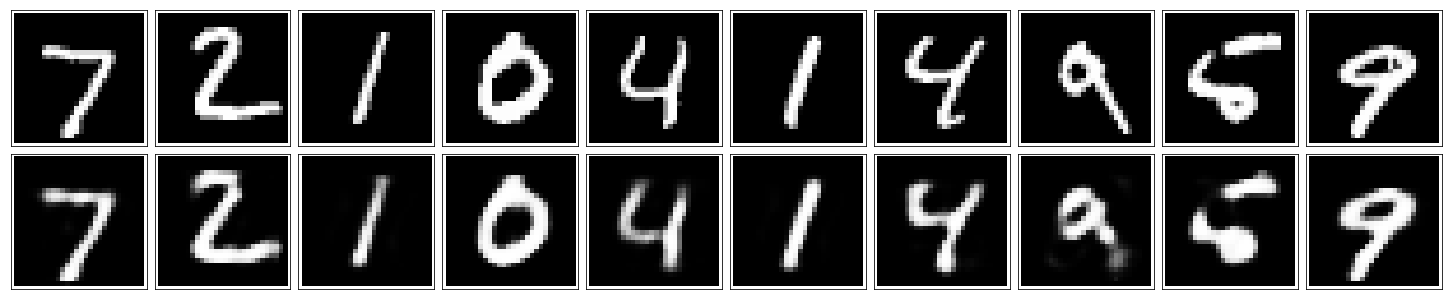

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.